# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

### 1. Criando a matriz:

In [4]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [5]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [6]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [7]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [8]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

C:\Users\gusta\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2.534
Date:                Wed, 22 Jan 2025   Prob (F-statistic):              0.283
Time:                        18:57:17   Log-Likelihood:                -4.2858
No. Observations:                   5   AIC:                             14.57
Df Residuals:                       2   BIC:                             13.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1419      0.530     -0.268      0.814      -2.422       2.138
sex[T.Female]     -1.1330      0.871     -1.300      0.323      -4.882       2.617
smoker[T.No]      -0.1419      0.530     -0.268      0.814      -2.422       2.138
time[T.Dinner]    -0.1419      0.530     -0.268      0.814      -2.422       2.138
net_bill           0.2093      0.097      2.163      0.163      -0.207       0.626
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.103
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.454
Skew:                          -0.120   Prob(JB):                        0.797
Kurtosis:                       1.543   Cond. No.                     5.37e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.22e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 2. Removendo variáveis não significantes:

In [10]:
reg = smf.ols('tip ~ sex + net_bill', data=tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           6.94e-22
Time:                        18:57:17   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3382      0.185      7.218      0.000       0.973       1.703
sex[T.Female]    -0.0150      0.153     -0.098      0.922      -0.317       0.287
net_bill          0.0992      0.009     10.827      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.672   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.346
Skew:                           0.752   Prob(JB):                     1.30e-13
Kurtosis:                       4.892   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Observando o gráfico de resíduos:

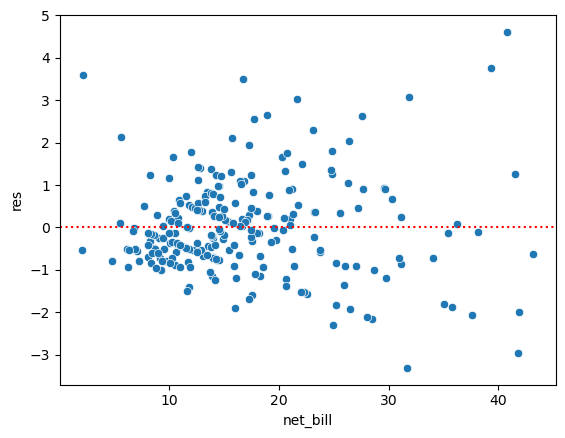

In [12]:
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

### 4. Transformando ```net_bill``` no log e um polinômio. Escolhendo o melhor modelo.

In [14]:
reg = smf.ols('tip ~ sex + np.log(net_bill)', data=tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.30
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           5.54e-19
Time:                        18:57:17   Log-Likelihood:                -382.39
No. Observations:                 244   AIC:                             770.8
Df Residuals:                     241   BIC:                             781.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2400      0.447     -2.772      0.006      -2.121      -0.359
sex[T.Female]       -0.0228      0.158     -0.145      0.885      -0.334       0.288
np.log(net_bill)     1.5661      0.158      9.895      0.000       1.254       1.878
==============================================================================
Omnibus:                       73.433   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.929
Skew:                           1.296   Prob(JB):                     4.76e-48
Kurtosis:                       6.836   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

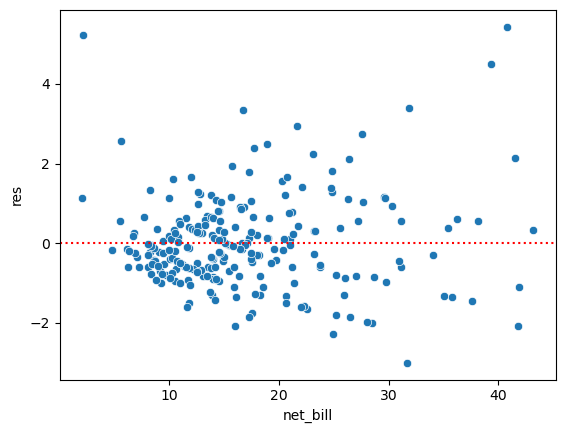

In [15]:
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

In [16]:
reg = smf.ols('tip ~ sex + np.power(net_bill, 2)', data=tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     51.90
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.81e-19
Time:                        18:57:18   Log-Likelihood:                -381.26
No. Observations:                 244   AIC:                             768.5
Df Residuals:                     241   BIC:                             779.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2776      0.123     18.523      0.000       2.035       2.520
sex[T.Female]            -0.0501      0.157     -0.320      0.749      -0.359       0.258
np.power(net_bill, 2)     0.0021      0.000     10.053      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.262   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.359
Skew:                           0.615   Prob(JB):                     2.56e-07
Kurtosis:                       4.215   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

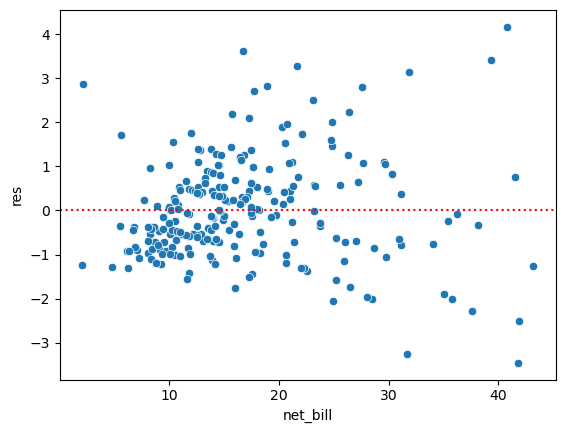

In [17]:
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

O melhor modelo é o com o net_bill sem nenhuma alteração. Foi o modelo que obteve o r-quadrado mais alto.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

### 1. Criando a matriz:

In [21]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [22]:
y

DesignMatrix with shape (5, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
  Terms:
    'np.log(tip)' (column 0)

### 2. Removendo variáveis não significantes:

In [24]:
reg = smf.ols('np.log(tip) ~ sex + net_bill', data=tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     54.29
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           3.43e-20
Time:                        18:57:18   Log-Likelihood:                -97.885
No. Observations:                 244   AIC:                             201.8
Df Residuals:                     241   BIC:                             212.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4940      0.059      8.317      0.000       0.377       0.611
sex[T.Female]     0.0011      0.049      0.022      0.983      -0.096       0.098
net_bill          0.0303      0.003     10.313      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.873   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.511
Skew:                          -0.215   Prob(JB):                        0.285
Kurtosis:                       3.250   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Observando o gráfico de resíduos:

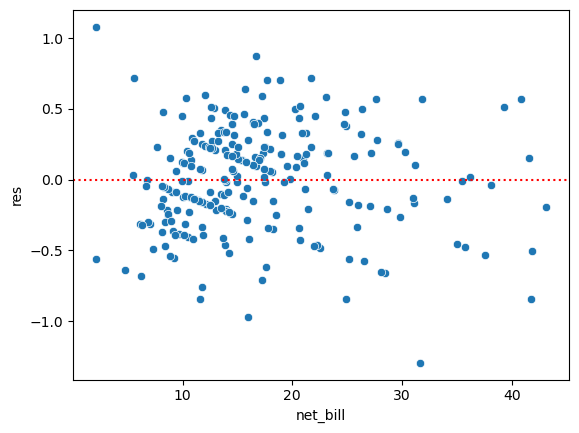

In [26]:
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

### 4. Transformando ```net_bill``` no log e um polinômio. Escolhendo o melhor modelo.

In [28]:
reg = smf.ols('np.log(tip) ~ sex + np.log(net_bill)', data=tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.50
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           7.55e-21
Time:                        18:57:18   Log-Likelihood:                -96.353
No. Observations:                 244   AIC:                             198.7
Df Residuals:                     241   BIC:                             209.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3975      0.139     -2.870      0.004      -0.670      -0.125
sex[T.Female]        0.0043      0.049      0.089      0.929      -0.092       0.101
np.log(net_bill)     0.5158      0.049     10.524      0.000       0.419       0.612
==============================================================================
Omnibus:                       12.789   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.604
Skew:                           0.143   Prob(JB):                     6.15e-07
Kurtosis:                       4.653   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

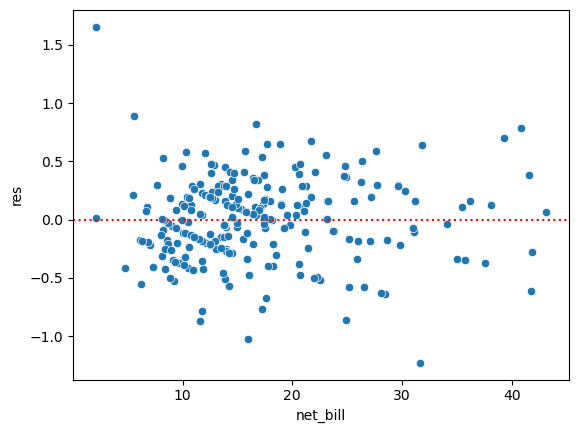

In [29]:
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

In [30]:
reg = smf.ols('np.log(tip) ~ sex + np.power(net_bill, 2)', data=tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     40.22
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           8.49e-16
Time:                        18:57:18   Log-Likelihood:                -108.13
No. Observations:                 244   AIC:                             222.3
Df Residuals:                     241   BIC:                             232.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7949      0.040     19.802      0.000       0.716       0.874
sex[T.Female]            -0.0133      0.051     -0.259      0.795      -0.114       0.087
np.power(net_bill, 2)     0.0006   6.93e-05      8.853      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.496   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.551
Skew:                          -0.239   Prob(JB):                        0.279
Kurtosis:                       2.853   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

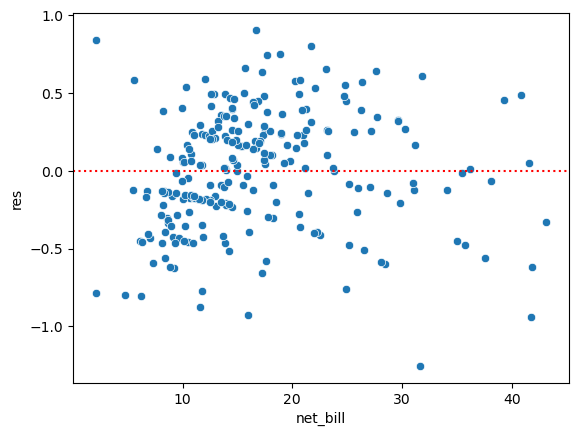

In [31]:
sns.scatterplot(x='net_bill', y='res', data=tips)
plt.axhline(y=0, color='r', linestyle=':')

O melhor modelo é o com o tip e o net_bill no log. Foi o modelo que obteve o r-quadrado mais alto. Considerando os modelos do item 1, o melhor modelo continua sendo o com o tip e net_bill sem nenhuma alteração.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [34]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [35]:
reg = smf.ols('renda ~ tempo_emprego', data=df).fit()
df['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:57:18   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

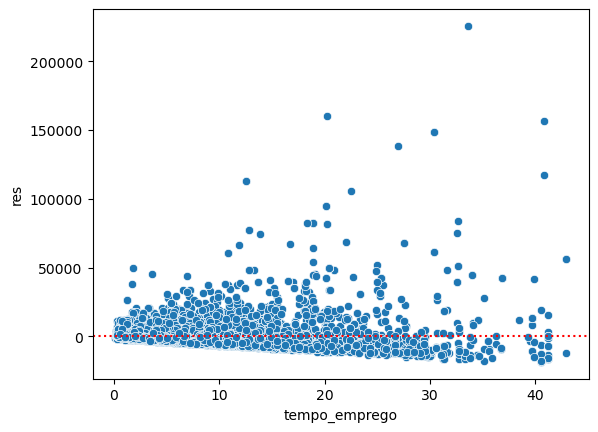

In [36]:
sns.scatterplot(x='tempo_emprego', y='res', data=df)
plt.axhline(y=0, color='r', linestyle=':')

In [37]:
reg = smf.ols('np.log(renda) ~ tempo_emprego + sexo + idade + qtd_filhos', data=df).fit()
df['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1625.
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:57:18   Log-Likelihood:                -13701.
No. Observations:               12427   AIC:                         2.741e+04
Df Residuals:                   12422   BIC:                         2.745e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.2825      0.033    221.361      0.000       7.218       7.347
sexo[T.M]         0.7849      0.014     56.840      0.000       0.758       0.812
tempo_emprego     0.0607      0.001     58.753      0.000       0.059       0.063
idade             0.0053      0.001      6.881      0.000       0.004       0.007
qtd_filhos        0.0275      0.009      3.185      0.001       0.011       0.044
==============================================================================
Omnibus:                        0.820   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.804
Skew:                           0.019   Prob(JB):                        0.669
Kurtosis:                       3.010   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

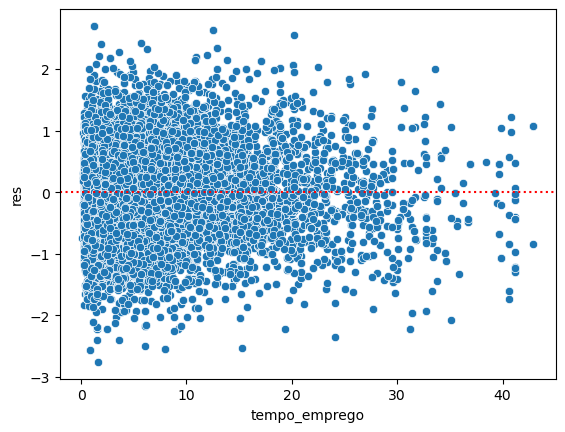

In [38]:
sns.scatterplot(x='tempo_emprego', y='res', data=df)
plt.axhline(y=0, color='r', linestyle=':')

O modelo se mostrou razoável, obtendo um r-quadrado de 0.344. Ao analisar o gráfico de resíduos, os resíduos se mostraram dispersos, mesmo que ainda tenham uma concentração. 